In [1]:
!pip install -r Requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 29.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 2.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 41.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 23.0 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

# scorer = make_scorer(r2_score)
scorer = make_scorer(mean_squared_error)

from sklearn.ensemble import RandomForestClassifier


In [3]:
data= pd.read_csv('clean_data_final.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91009 entries, 0 to 91008
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RN                    91009 non-null  float64
 1   UserinfoCountry       91009 non-null  int64  
 2   HealthcareWorker      91009 non-null  int64  
 3   Profession            91009 non-null  int64  
 4   Experiance            91009 non-null  int64  
 5   WorkPlace             91009 non-null  int64  
 6   SafeDeliveryApp       91009 non-null  int64  
 7   UserinfoIsMyLearning  91009 non-null  float64
 8   UserinfoUserIsActive  91009 non-null  float64
 9   Module_Key            91009 non-null  int64  
 10  Time                  91009 non-null  float64
 11  KlpResultLevel        91009 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 8.3 MB


# Experiance

In [5]:
# Separating out the x 
x_exp = data.drop(['Experiance'], axis=1)
# Separating out the target
y_exp = data['Experiance']

In [6]:
print('Size of x_exp dataset is: {}'.format(x_exp.shape))

Size of x_exp dataset is: (91009, 11)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_exp,
                                                    y_exp,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=y_exp)  
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (72807, 11)
Shape of y_train dataset:  (72807,)
Shape of X_test dataset:  (18202, 11)
Shape of y_test dataset:  (18202,)


In [8]:
def feature_imp(x_exp, model):
    fi = pd.DataFrame()
    fi["feature"] = x_exp.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [9]:
rf = RandomForestClassifier()

In [10]:
#fit the train set 
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.3760575760905395

In [11]:
# providing parameters to check
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 25, 30]}

In [12]:
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(rf, parameters_rf, scoring=scorer)

In [13]:
grid_obj

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 25, 30]},
             scoring=make_scorer(mean_squared_error))

In [14]:
grid_fit = grid_obj.fit(X_train, y_train)

In [15]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=30)

In [16]:
# Model performance on TRAIN data
print('train score :', best_reg.score(X_train, y_train))
print('test score:', best_reg.score(X_test, y_test))

train score : 0.4206601013638798
test score: 0.39979123173277664


In [17]:
#20 = 0.7600917494196987
#train score : 0.4190256431387092
#test score: 0.4002856828919899

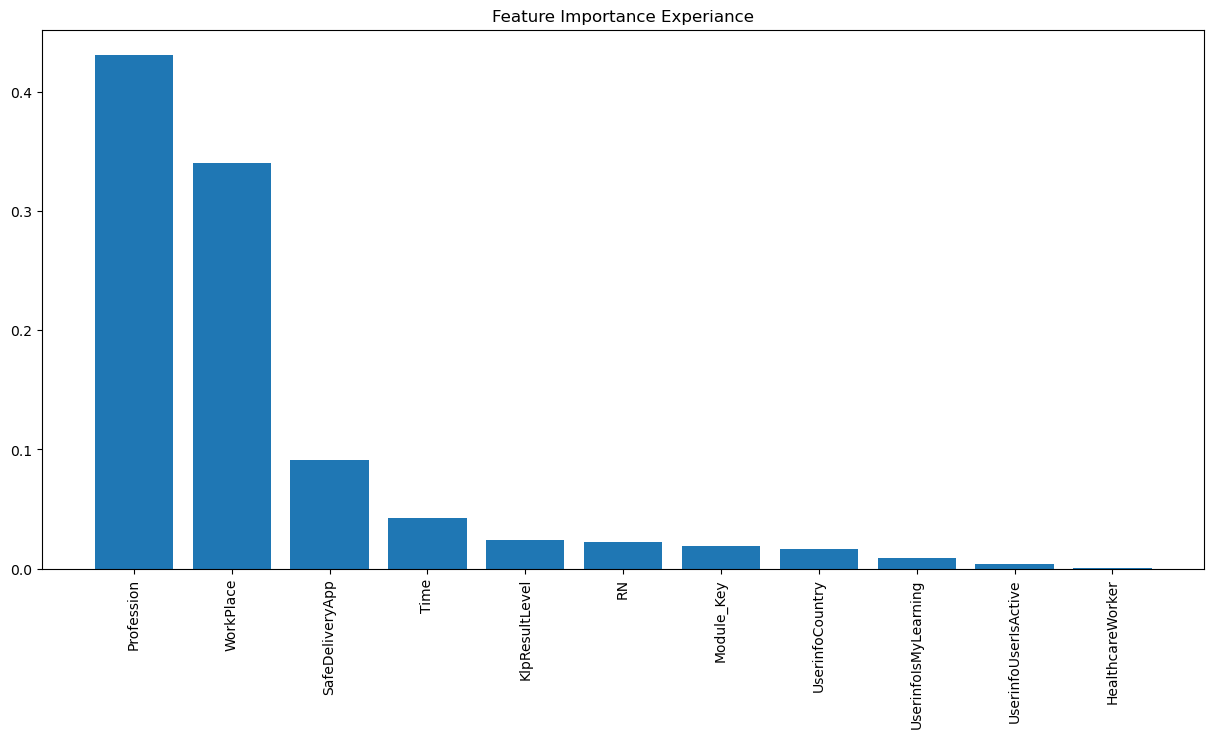

In [18]:
importances = best_reg.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance Experiance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# Profession

In [19]:
# Separating out the x 
x_prof = data.drop(['Profession'], axis=1)
# Separating out the target
y_prof = data['Profession']

In [20]:
print('Size of x_exp dataset is: {}'.format(x_prof.shape))

Size of x_exp dataset is: (91009, 11)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_prof,
                                                    y_prof,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=y_prof)  
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (72807, 11)
Shape of y_train dataset:  (72807,)
Shape of X_test dataset:  (18202, 11)
Shape of y_test dataset:  (18202,)


In [22]:
def feature_imp(x_prof, model):
    fi = pd.DataFrame()
    fi["feature"] = x_prof.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [23]:
#fit the train set 
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.5967476101527305

In [24]:
# providing parameters to check
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [ 25, 30, 50]}

In [25]:
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(rf, parameters_rf, scoring=scorer)

In [26]:
grid_obj

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 30, 50]},
             scoring=make_scorer(mean_squared_error))

In [27]:
grid_fit = grid_obj.fit(X_train, y_train)

In [28]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=25)

In [29]:
# Model performance on TRAIN data
print('train score :', best_reg.score(X_train, y_train))
print('test score:', best_reg.score(X_test, y_test))

train score : 0.7603115085087973
test score: 0.5837820019778046


In [30]:
#train score : 0.6252146084854479
#test score: 0.6186682782111855

SyntaxError: invalid syntax (422415168.py, line 1)

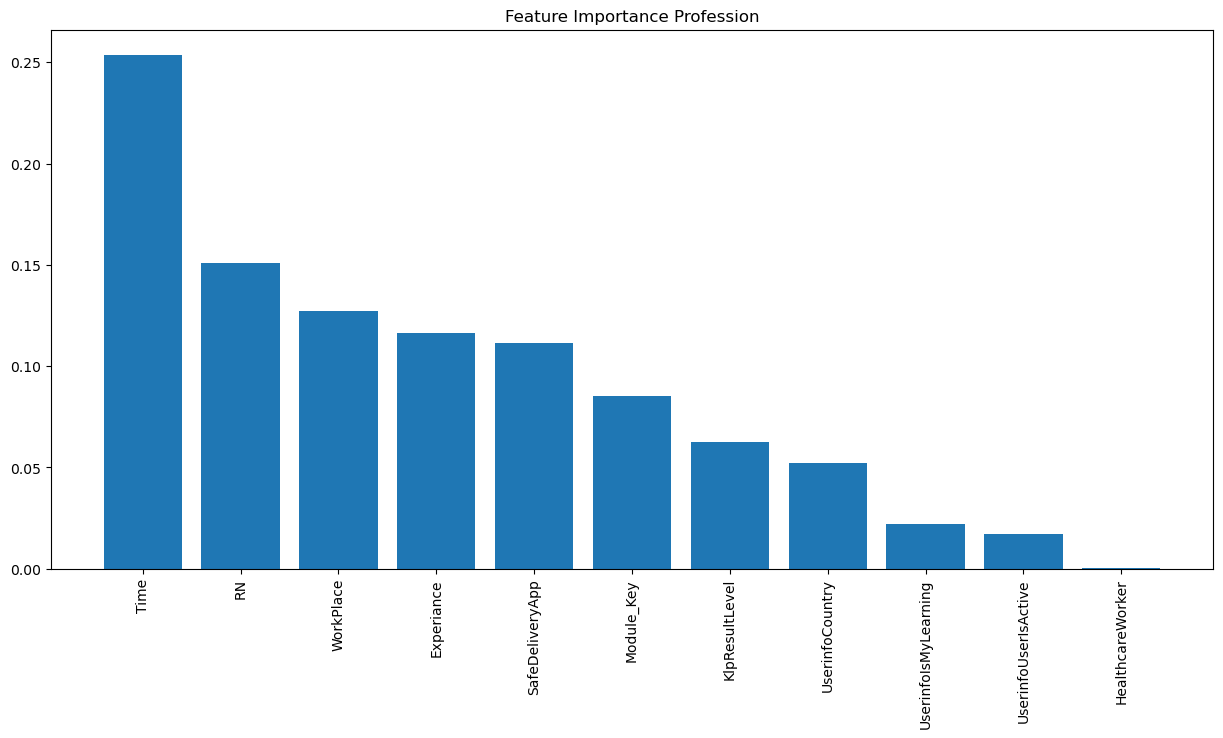

In [31]:
importances = best_reg.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance Profession") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# SafeDeliveryApp

In [32]:
# Separating out the x 
x_app = data.drop(['SafeDeliveryApp'], axis=1)
# Separating out the target
y_app = data['SafeDeliveryApp']

In [33]:
print('Size of x_exp dataset is: {}'.format(x_app.shape))

Size of x_exp dataset is: (91009, 11)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_app,
                                                    y_app,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=y_app)  
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (72807, 11)
Shape of y_train dataset:  (72807,)
Shape of X_test dataset:  (18202, 11)
Shape of y_test dataset:  (18202,)


In [35]:
def feature_imp(x_app, model):
    fi = pd.DataFrame()
    fi["feature"] = x_app.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [36]:
#fit the train set 
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.27518953961103176

In [37]:
# providing parameters to check
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [ 10, 20, 25, 50]}

In [38]:
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(rf, parameters_rf, scoring=scorer)

In [39]:
grid_obj

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 25, 50]},
             scoring=make_scorer(mean_squared_error))

In [40]:
grid_fit = grid_obj.fit(X_train, y_train)

In [41]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=10)

In [42]:
# Model performance on TRAIN data
print('train score :', best_reg.score(X_train, y_train))
print('test score:', best_reg.score(X_test, y_test))

train score : 0.5780076091584601
test score: 0.2622788704537963


5
train score : 0.5780076091584601
test score: 0.25738929787935394
1 
train score : 0.38820443089263396
test score: 0.2520602131633886

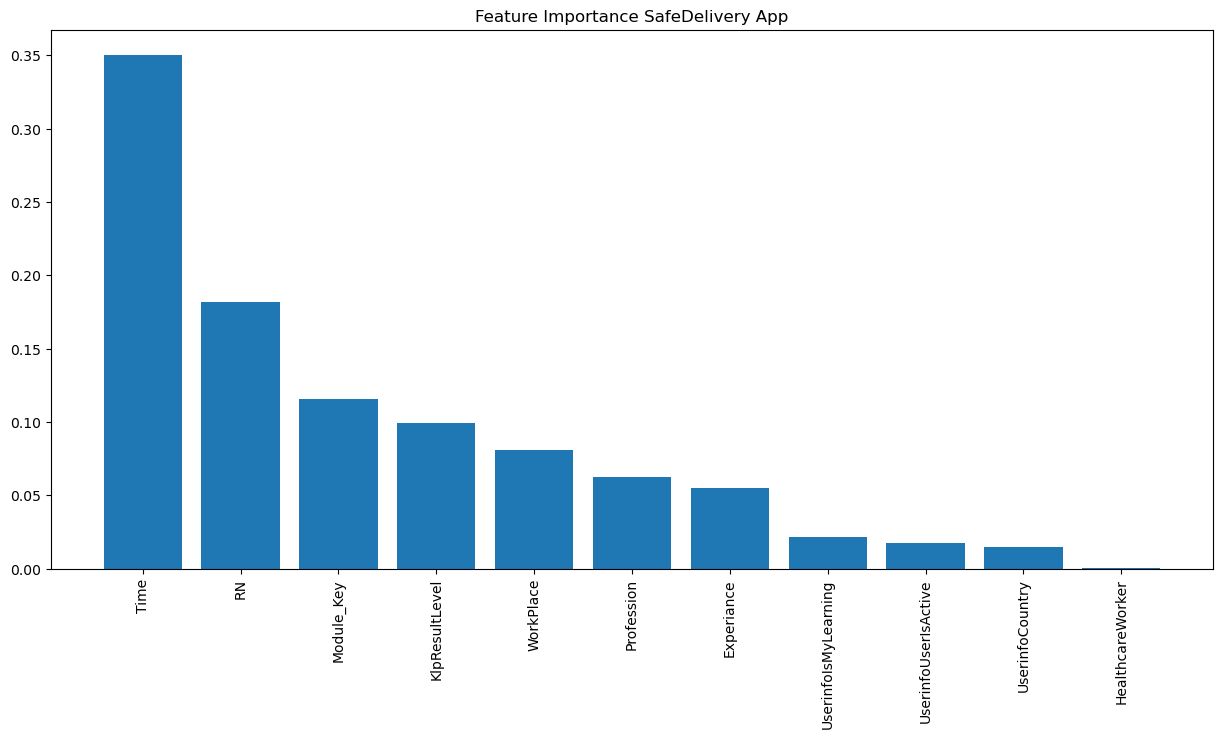

In [43]:
importances = best_reg.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance SafeDelivery App") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# Workplace

In [44]:
# Separating out the x 
x_work = data.drop(['WorkPlace'], axis=1)
# Separating out the target
y_work = data['WorkPlace']

In [45]:
print('Size of x_exp dataset is: {}'.format(x_work.shape))

Size of x_exp dataset is: (91009, 11)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x_work,
                                                    y_work,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=y_work)  
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (72807, 11)
Shape of y_train dataset:  (72807,)
Shape of X_test dataset:  (18202, 11)
Shape of y_test dataset:  (18202,)


In [47]:
def feature_imp(x_work, model):
    fi = pd.DataFrame()
    fi["feature"] = x_work.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [48]:
#fit the train set 
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.5003845731238326

In [49]:
# providing parameters to check
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [25, 30, 50]}

In [50]:
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(rf, parameters_rf, scoring=scorer)

In [51]:
grid_obj

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 30, 50]},
             scoring=make_scorer(mean_squared_error))

In [52]:
grid_fit = grid_obj.fit(X_train, y_train)

In [53]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=50)

In [54]:
# Model performance on TRAIN data
print('train score :', best_reg.score(X_train, y_train))
print('test score:', best_reg.score(X_test, y_test))

train score : 0.726290054527724
test score: 0.49071530601032853


In [ ]:
20
train score : 0.726290054527724
test score: 0.48873750137347544

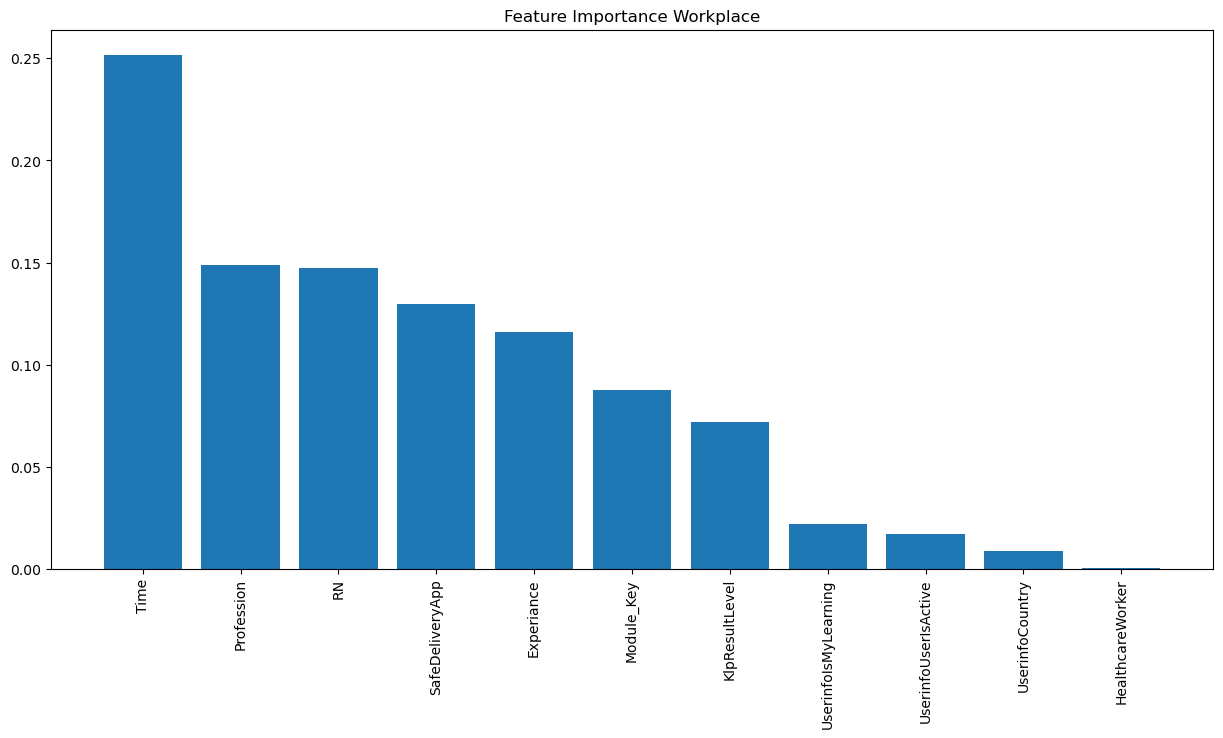

In [55]:
importances = best_reg.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance Workplace") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot